In [9]:
#!pip install xgboost

In [2]:
import pandas as pd
#import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.simplefilter('ignore')

In [4]:
loc = "http://football-data.co.uk/mmz4281/{}/E0.csv"
dataset = pd.DataFrame()
years = ['1314','1415','1516','1617']
for x in range(1,5):
    r1 = pd.read_csv(loc.format(years[x-1]), error_bad_lines=False, escapechar='\n')
    r1 = r1[['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTHG','HTAG','HTR','HS','AS','HST','AST','HF','AF','HC','AC','HY','AY','HR','AR']]
    dataset = dataset.append(r1)

In [5]:
dataset.shape

(1521, 20)

In [6]:
dataset.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,Arsenal,Aston Villa,1.0,3.0,A,1.0,1.0,D,16.0,9.0,4.0,4.0,15.0,18.0,4.0,3.0,4.0,5.0,1.0,0.0
1,Liverpool,Stoke,1.0,0.0,H,1.0,0.0,H,26.0,10.0,11.0,4.0,11.0,11.0,12.0,6.0,1.0,1.0,0.0,0.0
2,Norwich,Everton,2.0,2.0,D,0.0,0.0,D,8.0,19.0,2.0,6.0,13.0,10.0,6.0,8.0,2.0,0.0,0.0,0.0
3,Sunderland,Fulham,0.0,1.0,A,0.0,0.0,D,20.0,5.0,3.0,1.0,14.0,14.0,6.0,1.0,0.0,3.0,0.0,0.0
4,Swansea,Man United,1.0,4.0,A,0.0,2.0,A,17.0,15.0,6.0,7.0,13.0,10.0,7.0,4.0,1.0,3.0,0.0,0.0


In [7]:
train_dup = dataset.copy()

In [8]:
le = LabelEncoder()
train_dup['FTR'] = le.fit_transform(train_dup['FTR'].astype(str))

X1 = train_dup.drop(['HomeTeam','AwayTeam','FTHG','FTAG','FTR','HTR','HTHG','HTAG'], axis=1)
Y1 = train_dup.FTR

In [9]:
X1.head()

,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,16.0,9.0,4.0,4.0,15.0,18.0,4.0,3.0,4.0,5.0,1.0,0.0
1,26.0,10.0,11.0,4.0,11.0,11.0,12.0,6.0,1.0,1.0,0.0,0.0
2,8.0,19.0,2.0,6.0,13.0,10.0,6.0,8.0,2.0,0.0,0.0,0.0
3,20.0,5.0,3.0,1.0,14.0,14.0,6.0,1.0,0.0,3.0,0.0,0.0
4,17.0,15.0,6.0,7.0,13.0,10.0,7.0,4.0,1.0,3.0,0.0,0.0


In [10]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.3, random_state=0)

In [11]:
# Create a random forest classifier
clf1 = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

# Train the classifier
clf1.fit(X1_train, Y1_train)

# Print the name and gini importance of each feature
for feature in zip(X1.columns, clf1.feature_importances_):
    print(feature)

('HS', 0.10618485857078458)
('AS', 0.107786466058276)
('HST', 0.13695065401355225)
('AST', 0.12628252789643765)
('HF', 0.09578660822749412)
('AF', 0.09629919693144506)
('HC', 0.0960538541209992)
('AC', 0.08839233645142575)
('HY', 0.0585829855604841)
('AY', 0.0634978276330898)
('HR', 0.011319542849378533)
('AR', 0.012863141686633295)


In [12]:
df = dataset.copy()

In [13]:
table = pd.DataFrame(columns=('Team','HTGS','ATGS','HTAS','ATAS','HTGC','ATGC','HTDS','ATDS'))

avg_home_scored = df.FTHG.sum() / 1521.0
avg_away_scored = df.FTAG.sum() / 1521.0
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored
print(avg_home_scored)

1.5332018408941486


In [14]:
res_home = df.groupby('HomeTeam')
res_away = df.groupby('AwayTeam')

In [15]:
#df.groupby('HomeTeam').groups.keys().values

In [16]:
table.Team = res_home.groups.keys()
table.HTGS = res_home.FTHG.sum().values
table.HTGC = res_home.FTAG.sum().values
table.ATGS = res_away.FTAG.sum().values
table.ATGC = res_away.FTHG.sum().values
#19 Home matches for each team per season and 4 seasons therefore 76 home matches and 76 away matches
table.HTAS = (table.HTGS / 76.0) / avg_home_scored
table.ATAS = (table.ATGS / 76.0) / avg_away_scored
table.HTDS = (table.HTGC / 76.0) / avg_home_conceded
table.ATDS = (table.ATGC / 76.0) / avg_away_conceded

table.head()

,Team,HTGS,ATGS,HTAS,ATAS,HTGC,ATGC,HTDS,ATDS
0,Arsenal,147.0,134.0,1.261550,1.502388,52.0,105.0,0.583016,0.901107
1,Aston Villa,54.0,43.0,0.463426,0.482110,89.0,105.0,0.997855,0.901107
2,Bournemouth,58.0,42.0,0.497754,0.470898,63.0,71.0,0.706347,0.609320
3,Burnley,40.0,27.0,0.343279,0.302720,41.0,67.0,0.459686,0.574992
4,Cardiff,20.0,12.0,0.171639,0.134542,35.0,39.0,0.392415,0.334697


In [17]:
#Extract necessary features from the data file
feature_table = df.iloc[:,:20]

In [18]:
feature_table=feature_table.dropna()

In [19]:
#Full Time Result(FTR), Home Shots on Target(HST), Away Shots on Target(AST), Home Corners(HC), Away Corners(AC)
feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST','HC','AC']]

#Home Attacking Strength(HAS), Home Defensive Strength(HDS), Away Attacking Strength(AAS), Away Defensive Strength(ADS)
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table[table['Team'] == row['HomeTeam']]['HTAS'].values[0])
    f_HDS.append(table[table['Team'] == row['HomeTeam']]['HTDS'].values[0])
    f_AAS.append(table[table['Team'] == row['AwayTeam']]['ATAS'].values[0])
    f_ADS.append(table[table['Team'] == row['AwayTeam']]['ATDS'].values[0])

feature_table['HTAS'] = f_HAS
feature_table['HTDS'] = f_HDS
feature_table['ATAS'] = f_AAS
feature_table['ATDS'] = f_ADS
feature_table.head()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HTAS,HTDS,ATAS,ATDS
0,Arsenal,Aston Villa,A,4.0,4.0,4.0,3.0,1.261550,0.583016,0.482110,0.901107
1,Liverpool,Stoke,H,11.0,4.0,12.0,6.0,1.381697,0.874525,0.784830,1.038419
2,Norwich,Everton,D,2.0,6.0,6.0,8.0,0.369025,0.538169,0.986643,0.875361
3,Sunderland,Fulham,A,3.0,1.0,6.0,1.0,0.652230,1.210880,0.179390,0.403353
4,Swansea,Man United,A,6.0,7.0,7.0,4.0,0.918271,1.143609,1.188456,0.746632


In [20]:
def transformResult(row):
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [21]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)
feature_table.head()

,HomeTeam,AwayTeam,FTR,HST,AST,HC,AC,HTAS,HTDS,ATAS,ATDS,Result
0,Arsenal,Aston Villa,A,4.0,4.0,4.0,3.0,1.261550,0.583016,0.482110,0.901107,-1
1,Liverpool,Stoke,H,11.0,4.0,12.0,6.0,1.381697,0.874525,0.784830,1.038419,1
2,Norwich,Everton,D,2.0,6.0,6.0,8.0,0.369025,0.538169,0.986643,0.875361,0
3,Sunderland,Fulham,A,3.0,1.0,6.0,1.0,0.652230,1.210880,0.179390,0.403353,-1
4,Swansea,Man United,A,6.0,7.0,7.0,4.0,0.918271,1.143609,1.188456,0.746632,-1


In [22]:
#Two sets of training sets - adding features.
X_train = feature_table[['HTAS','HTDS','ATAS','ATDS']]
X_train_2 = feature_table[['HTAS','HTDS','ATAS','ATDS','HST','AST','HC','AC']]
y_train = feature_table['Result']
display(X_train.tail())
display(X_train_2.tail())

,HTAS,HTDS,ATAS,ATDS
375,1.381697,0.874525,0.112119,0.257459
376,1.055583,0.639076,0.975431,0.986927
377,1.072746,0.885736,0.784830,1.038419
378,0.918271,1.143609,0.706347,0.926853
379,0.386189,0.538169,1.625719,0.772377


,HTAS,HTDS,ATAS,ATDS,HST,AST,HC,AC
375,1.381697,0.874525,0.112119,0.257459,10.0,3.0,3.0,3.0
376,1.055583,0.639076,0.975431,0.986927,2.0,1.0,3.0,6.0
377,1.072746,0.885736,0.784830,1.038419,6.0,3.0,4.0,10.0
378,0.918271,1.143609,0.706347,0.926853,2.0,5.0,7.0,4.0
379,0.386189,0.538169,1.625719,0.772377,3.0,9.0,4.0,5.0


In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline  
from sklearn.svm import SVC
from sklearn import linear_model

In [24]:
nbb_scores = []
nbb_scores_2 = []

for i in range(0,1000,50):
    clf1 = MultinomialNB(alpha=i)
    clf1.fit(X_train,y_train)
    clf1.fit(X_train_2,y_train)
    scores = cross_val_score(clf1, X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf1, X_train_2, y_train, cv=10)
    print ("NB alpha ",i," ", scores.mean(), " : ", scores_2.mean())
    
    nbb_scores.append(scores.mean())  
    nbb_scores_2.append(scores_2.mean())

NB alpha  0   0.45659345859661615  :  0.588155437613642
NB alpha  50   0.4572428092459668  :  0.5933716879022171
NB alpha  100   0.4572428092459668  :  0.5907486530423401
NB alpha  150   0.4572428092459668  :  0.5920343405378671
NB alpha  200   0.4572428092459668  :  0.5861216052905103
NB alpha  250   0.4572428092459668  :  0.5861216052905103
NB alpha  300   0.4572428092459668  :  0.587459065451756
NB alpha  350   0.4572428092459668  :  0.586117361168619
NB alpha  400   0.4572428092459668  :  0.5841564082142886
NB alpha  450   0.4572428092459668  :  0.583511414483725
NB alpha  500   0.4572428092459668  :  0.5841779102612452
NB alpha  550   0.4572428092459668  :  0.5841992425581194
NB alpha  600   0.4572428092459668  :  0.577611241851959
NB alpha  650   0.4572428092459668  :  0.5782821503919754
NB alpha  700   0.4572428092459668  :  0.5743258414300794
NB alpha  750   0.4572428092459668  :  0.5749880361325218
NB alpha  800   0.4572428092459668  :  0.573018594934409
NB alpha  850   0.4572

In [25]:
clf = [MultinomialNB(alpha=1), SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]

labels = [ 'Naive Bayes', 'SVM', 'Log regres']

mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,3):

    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())

Naive Bayes  :  0.45659345859661615  :  0.588155437613642
SVM  :  0.545887723256862  :  0.6190994653086896
Log regres  :  0.5571930218056147  :  0.6177923327193927


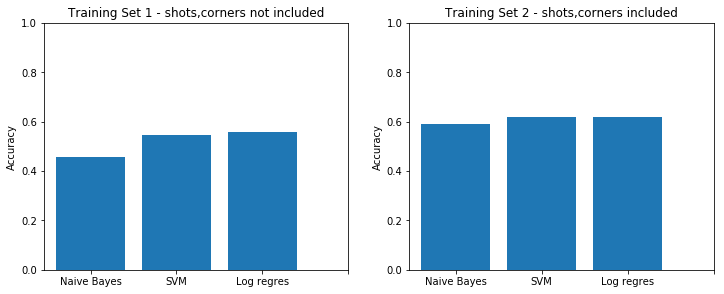

In [26]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,3),mean_scores,align='center');
ax.set_xticks(range(4));
ax.set_xticks(range(4));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1 - shots,corners not included")
ax.set_xticklabels(labels);

ax2 = fig.add_subplot(2,2,2);
ax2.bar(range(0,3),mean_scores_2,align='center');
ax2.set_xticks(range(4))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1);
ax2.set_title("Training Set 2 - shots,corners included")
ax2.set_xticklabels(labels);

In [27]:
from sklearn.preprocessing import normalize
X_train = normalize(X_train)
X_train_2 = normalize(X_train_2)
pd.set_option('display.expand_frame_repr', False)

display(X_train)

array([[0.73130686, 0.33796831, 0.27947379, 0.52236204],
       [0.66109533, 0.41843032, 0.37551439, 0.49684804],
       [0.25076895, 0.36571002, 0.67046838, 0.59484727],
       ...,
       [0.56307808, 0.46491764, 0.41195234, 0.54505958],
       [0.49020346, 0.61049637, 0.37707129, 0.4947848 ],
       [0.20136142, 0.28060494, 0.84766076, 0.40272284]])

In [28]:
nbb_scores = []
nbb_scores_2 = []

for i in range(0,1000,50):
    clf1 = MultinomialNB(alpha=i)
    clf1.fit(X_train,y_train)
    clf1.fit(X_train_2,y_train)
    scores = cross_val_score(clf1, X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf1, X_train_2, y_train, cv=10)
    print ("NB alpha ",i," ", scores.mean(), " : ", scores_2.mean())
    
    nbb_scores.append(scores.mean())  
    nbb_scores_2.append(scores_2.mean())

NB alpha  0   0.4572428092459668  :  0.4611989484577802
NB alpha  50   0.4572428092459668  :  0.4579007039828089
NB alpha  100   0.4572428092459668  :  0.4572428092459668
NB alpha  150   0.4572428092459668  :  0.4572428092459668
NB alpha  200   0.4572428092459668  :  0.4572428092459668
NB alpha  250   0.4572428092459668  :  0.4572428092459668
NB alpha  300   0.4572428092459668  :  0.4572428092459668
NB alpha  350   0.4572428092459668  :  0.4572428092459668
NB alpha  400   0.4572428092459668  :  0.4572428092459668
NB alpha  450   0.4572428092459668  :  0.4572428092459668
NB alpha  500   0.4572428092459668  :  0.4572428092459668
NB alpha  550   0.4572428092459668  :  0.4572428092459668
NB alpha  600   0.4572428092459668  :  0.4572428092459668
NB alpha  650   0.4572428092459668  :  0.4572428092459668
NB alpha  700   0.4572428092459668  :  0.4572428092459668
NB alpha  750   0.4572428092459668  :  0.4572428092459668
NB alpha  800   0.4572428092459668  :  0.4572428092459668
NB alpha  850   0

In [29]:
#With Normalization
clf = [MultinomialNB(alpha=10), SVC(kernel = 'linear', C=1.5, probability=True), LogisticRegression()]

labels = [ 'Naive Bayes', 'SVM', 'Log regres']

mean_scores = []
mean_scores_2 = []
cms = []

for i in range(0,3):

    clf[i].fit(X_train,y_train)
    clf[i].fit(X_train_2,y_train)

    scores = cross_val_score(clf[i], X_train, y_train, cv=10)
    scores_2 = cross_val_score(clf[i], X_train_2, y_train, cv=10)
    print (labels[i]," : ", scores.mean(), " : ", scores_2.mean())
    
    mean_scores.append(scores.mean())  
    mean_scores_2.append(scores_2.mean())

Naive Bayes  :  0.4572428092459668  :  0.4605366968021511
SVM  :  0.5505617925212271  :  0.6033220438803446
Log regres  :  0.5558596360161776  :  0.6072828225579235


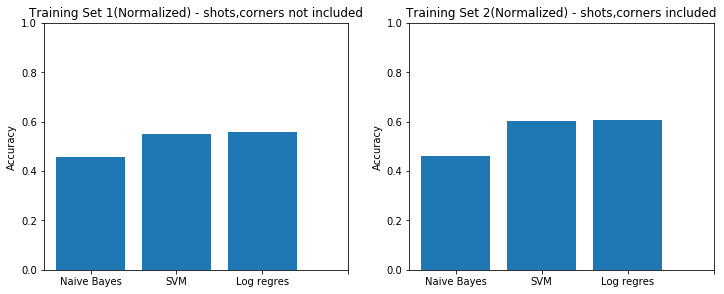

In [30]:
fig = plt.figure(figsize = (12,10))

ax = fig.add_subplot(2,2,1)

ax.bar(range(0,3),mean_scores,align='center');
ax.set_xticks(range(4));
ax.set_xticks(range(4));
ax.set_ylim(0,1);
ax.set_ylabel("Accuracy")
ax.set_title("Training Set 1(Normalized) - shots,corners not included")
ax.set_xticklabels(labels);

ax2 = fig.add_subplot(2,2,2);
ax2.bar(range(0,3),mean_scores_2,align='center');
ax2.set_xticks(range(4))
ax2.set_ylabel("Accuracy")
ax2.set_ylim(0,1);
ax2.set_title("Training Set 2(Normalized) - shots,corners included")
ax2.set_xticklabels(labels);
